Артем Жук, 399 группа
# EM for PCA

Тут размещены различного рода графики, демонстрирующие работу алгоритма.

## EMPCA

In [1]:
from empca import EMPCA
from empca_missing import EMPCAM
from sklearn.decomposition import PCA
import numpy as np
from utils import random_model, gram_schmidt, span_in, add_missing
import matplotlib.pyplot as plt
from copy import deepcopy
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
%matplotlib inline

##### Демонстрация работы в двумерном случае
Посмотрим на работу нашего алгоритма в двумерном случае. Синие точки -- исходная данная с шумом, красные -- восстановленная зависимость по одной компотненте.

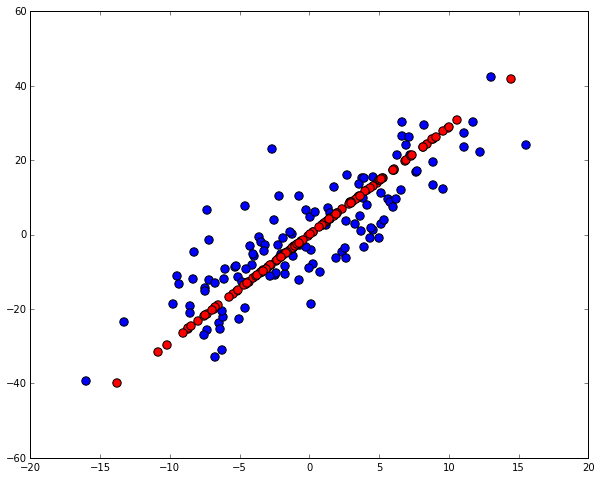

In [2]:
W = np.array([[5, 15]]).T 
X, W, T = random_model(120, 2, 1, W=W, eps=10) 
Xt = deepcopy(X) # original data

empca = EMPCA(n_components=1, n_iter=100)
Xf = empca.fit_transform(X).dot(empca.components_)

plt.figure(figsize=(10, 8))
plt.scatter(Xt[:, 0], Xt[:, 1], c='b', cmap='summer', s=70)
plt.scatter(Xf[:, 0], Xf[:, 1], c='r', cmap='summer', s=70)
plt.show()


##### Зависимость от числа итераций
Теперь посмотрим, как меняется картина с числом итераций. 

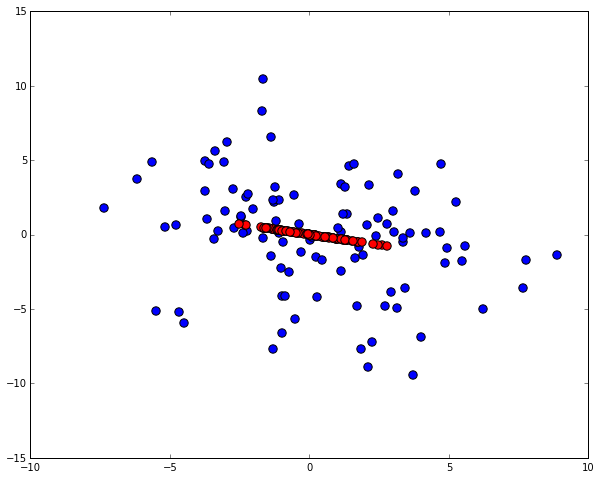

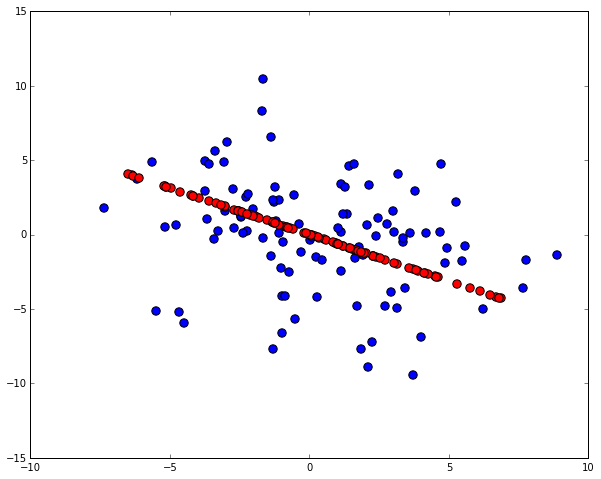

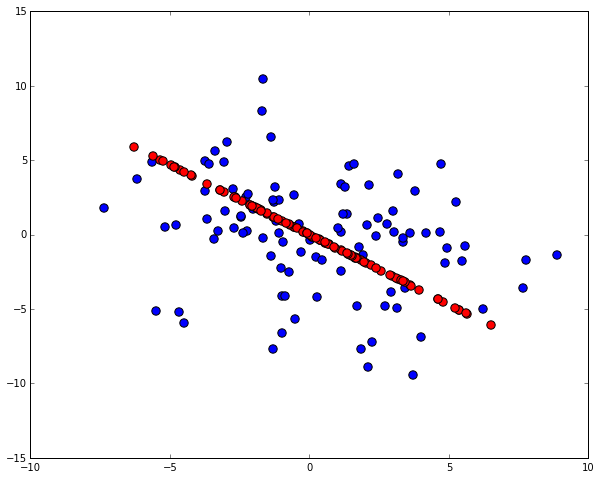

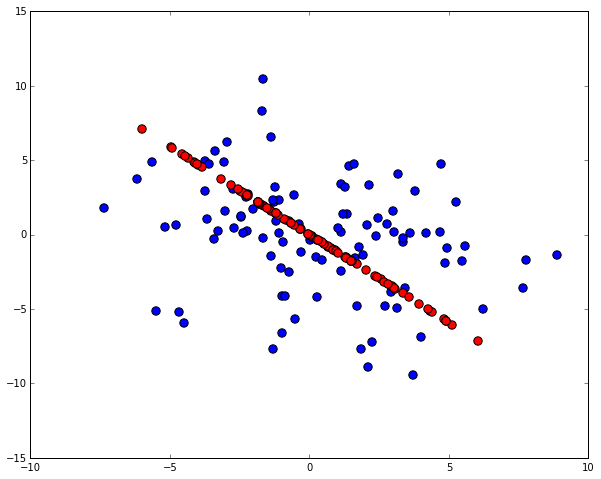

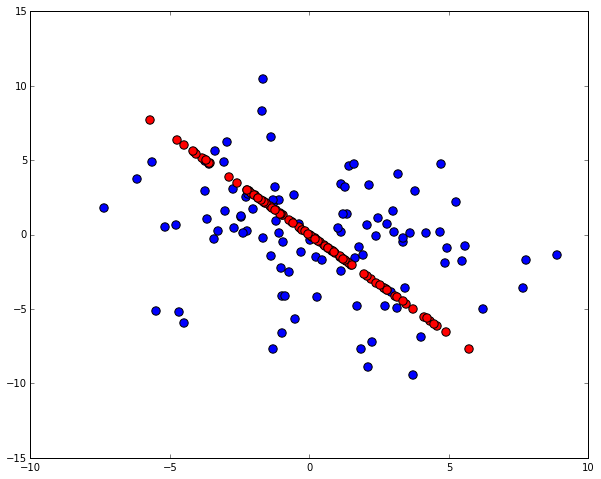

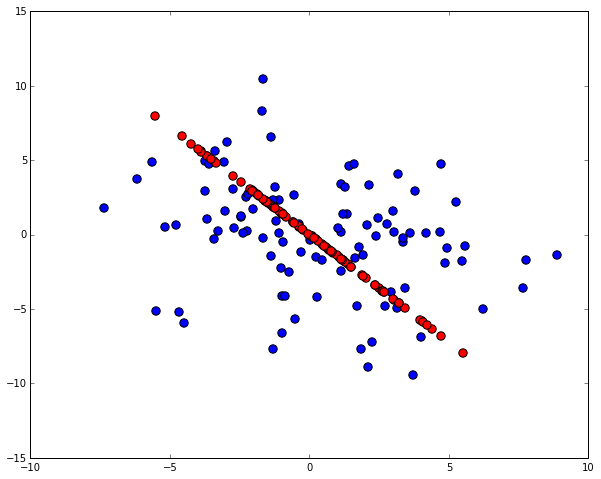

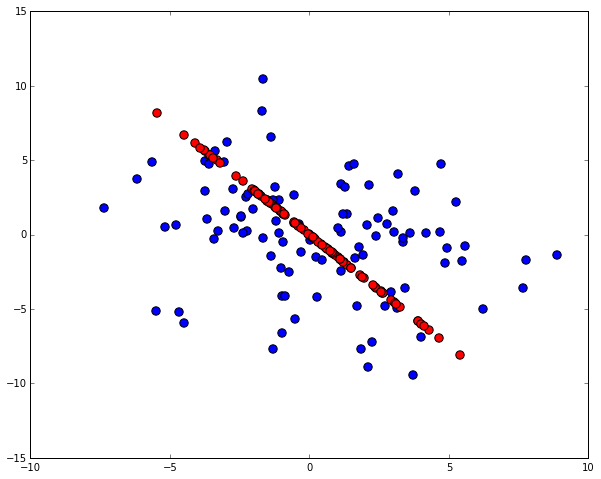

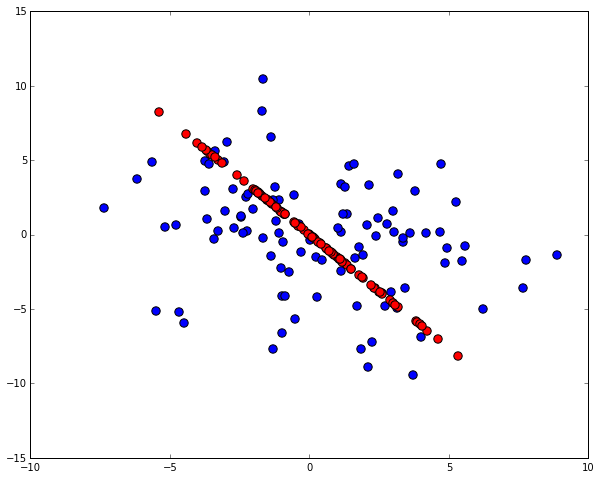

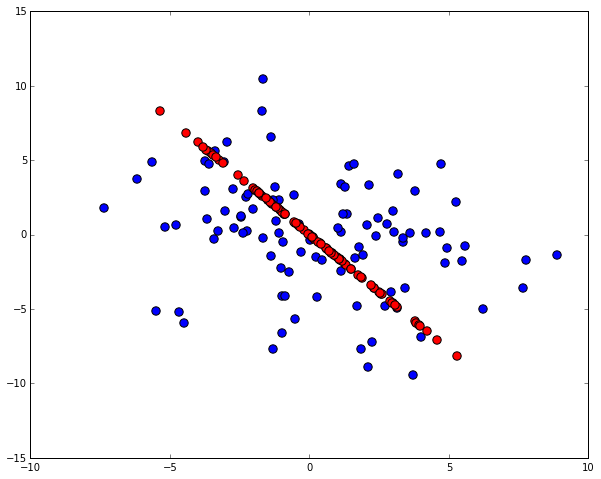

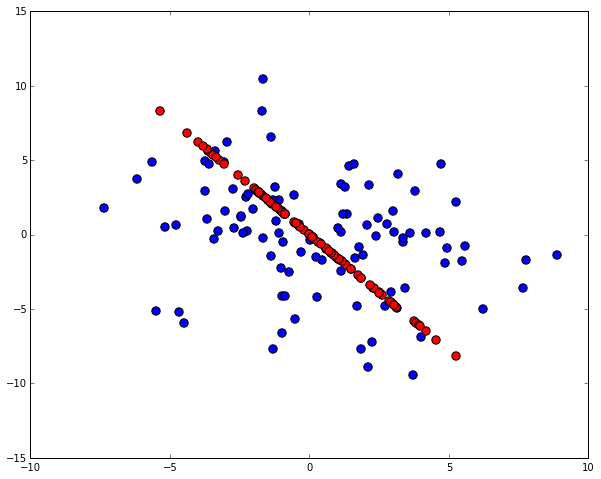

In [3]:
W = np.array([[-1, 3]]).T 
X, W, T = random_model(100, 2, 1, W=W, eps=10) 
empca = EMPCA(n_components=1)
empca.init_(X)

Xt = deepcopy(X) # original data

for k in range(10):
    Xf = empca.transform(X).dot(empca.components_)
    plt.figure(figsize=(10, 8))
    plt.scatter(Xt[:, 0], Xt[:, 1], c='b', cmap='summer', s=70)
    plt.scatter(Xf[:, 0], Xf[:, 1], c='r', cmap='summer', s=70)
    plt.show()
    
    for _ in range(1):
        empca.make_iteration_()
    

Как видим, сходится довольно быстро.

##### Зависимость среднеквадратической ошибки от числа итераций

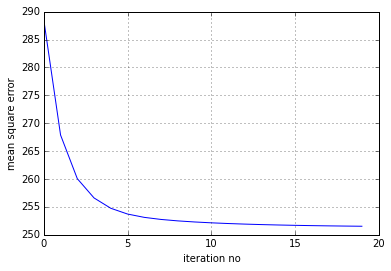

In [4]:
X, W, T = random_model(50, 100, 50, eps=10)
empca = EMPCA(n_components=10)
empca.init_(X)

n = 20
err = []
for _ in range(n):
    empca.make_iteration_()
    err.append(empca.mean_square_error(X))

x = np.arange(0, n, 1)

plt.xlabel('iteration no')
plt.ylabel('mean square error')
plt.grid(True)
plt.plot(x, err)
plt.show()



#### Применение к обработке изображений

Возьмем изображение, разобьем на блоки 10 х 10 и спроецируем на 30 главных векторов. 

(918, 900, 4)


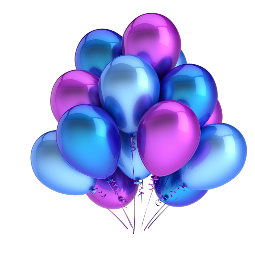

In [5]:
pic = plt.imread('ballon.png')
print(pic.shape)
plt.imshow(pic)
plt.axis('off')
plt.show()

In [31]:
% time
# print(pic.shape)
pic = np.delete(pic, range(910, 918), 0)
print(pic.shape)
blocks = pic.reshape(91 * 90, 10 * 10 * 4)

empca = EMPCA(n_components=30, n_iter=10)
empca.fit(blocks)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.15 µs
(910, 900, 4)


In [7]:
print(empca.explained_variance_ratio_)

[ 0.59995558  0.29768652  0.12804103  0.02622862  0.26566324  0.05108773
  0.01600051  0.01621244  0.01672859  0.00550686  0.00687053  0.01226075
  0.00688331  0.00708616  0.01223824  0.01153438  0.00308809  0.00517065
  0.00245326  0.00273674  0.00461404  0.00152477  0.00209348  0.0019358
  0.00180203  0.00157609  0.00120632  0.00134028  0.00128413  0.00136511]


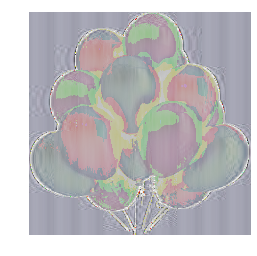

In [35]:
Y = empca.transform(blocks)
npic = empca.inverse_transform(Y)

npic = np.reshape(npic, pic.shape)

plt.imshow(npic)
plt.axis('off')
plt.show()

#### EMPCAM
Этот класс реализует тот же алгоритм, но допускает пропуски в данных. 


Применим его для восстановления компонент. Сгенерируем выборку, а потом удалим 20% точек. 
Синие точки -- исходная выборка с шумом, красные -- восстановленная зависимость.

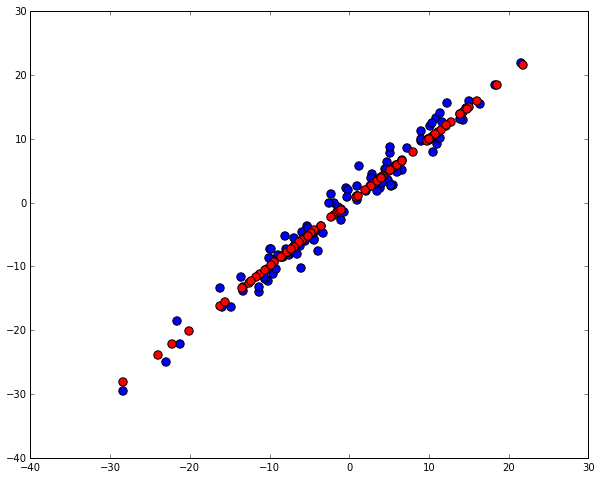

In [12]:
W = np.array([[10, 10]]).T
X, W, T = random_model(100, 2, 1, W=W, eps=2)

Xt = deepcopy(X) # original data

add_missing(X, .2) # deletes 20% of points
empcam = EMPCAM(n_components=1, n_iter=100)
empcam.fit(X)

Xf = empcam.fill_missing(X)

plt.figure(figsize=(10, 8))
plt.scatter(Xt[:, 0], Xt[:, 1], c='b', cmap='summer', s=70)
plt.scatter(Xf[:, 0], Xf[:, 1], c='r', cmap='summer', s=70)
plt.show()


